In [1]:
import pandas as pd
%pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()

Saving A13.txt to A13 (1).txt


In [3]:
import io

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['A13.txt']), header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-14.514,-29.542,-34.6050,24.821,6.3932,-30.119,84.482,5.1443,-27.501,-34.985,-7.7625,19.211
1,-17.619,-29.093,-30.7140,26.356,3.0571,-28.203,82.611,5.4154,-26.429,-33.400,-8.4981,18.072
2,-22.706,-28.381,-24.5790,28.752,-2.4137,-25.054,80.767,6.0363,-24.514,-31.825,-8.6064,16.926
3,-30.530,-27.219,-15.2590,32.270,-10.8970,-20.113,78.916,7.2030,-21.301,-30.276,-7.7247,15.759
4,-40.268,-25.520,-3.4883,36.405,-21.6340,-13.682,77.005,8.9045,-16.927,-28.766,-5.8652,14.563


# 1. Visualization

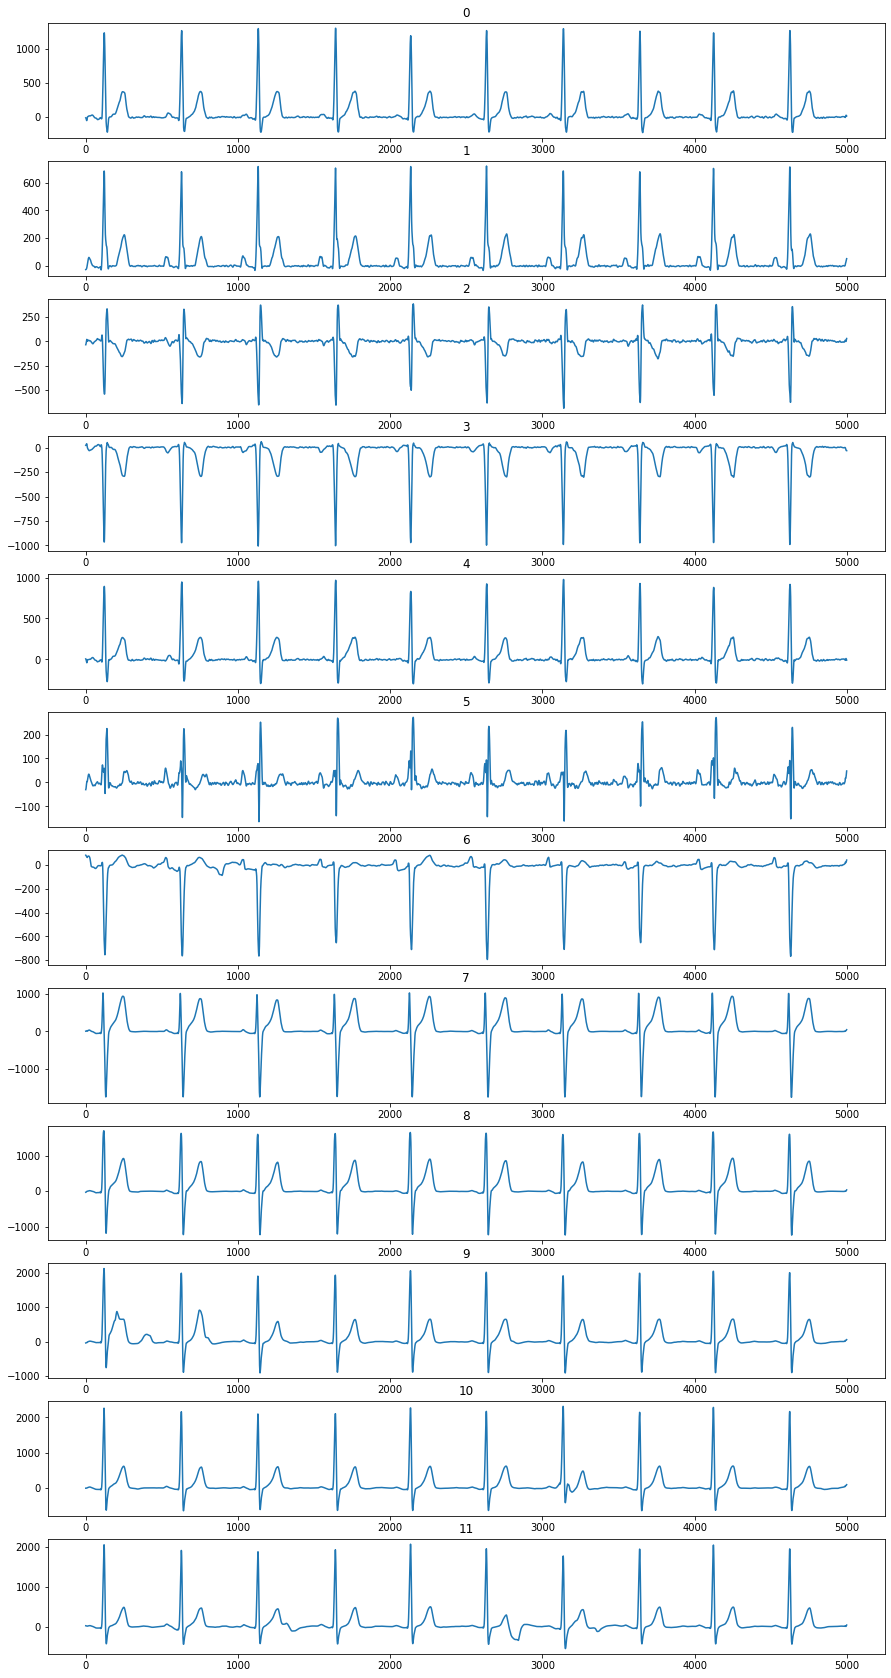

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
t = np.arange(0, 5000)
plt.figure(1, figsize=(15, 30))

for x in range(0, 12):
  plt.subplot(12, 1, x + 1).set_title(str(x))
  plt.plot(t, df.iloc[:, x])

# 2. Dataset description

In [7]:
df = df.rename(columns={0: "zero", 1: "one", 2: "two", 3:"three", 4: "four", 5:"five", 6:"six", 7:"seven", 8: "eight", 9:"nine", 10:"ten", 11:"eleven"})
df.describe(include='all').loc['mean']

zero       64.476566
one        41.427255
two       -19.946345
three     -54.508454
four       43.532617
five        7.423669
six       -25.518986
seven      69.248284
eight     112.151698
nine      102.830755
ten        98.485079
eleven     72.621542
Name: mean, dtype: float64

In [8]:
df.describe()

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,64.476566,41.427255,-19.946345,-54.508454,43.532617,7.423669,-25.518986,69.248284,112.151698,102.830755,98.485079,72.621542
std,201.009121,105.999845,108.364117,151.174117,152.893707,39.773720,122.006665,382.291574,367.475396,348.732384,338.286075,290.575493
min,-232.100000,-35.751000,-688.790000,-1006.200000,-298.780000,-163.940000,-794.630000,-1775.700000,-1239.300000,-903.480000,-648.330000,-554.930000
25%,-10.390500,-5.918550,-12.992250,-36.002000,-8.726225,-8.478375,-12.694500,-8.769375,-9.426000,-22.502250,-11.800250,-18.912500
50%,-2.537050,-2.246200,1.419950,1.792200,-1.567650,-3.018950,-2.344600,-1.464750,-0.760165,0.868825,0.488675,3.252450
75%,33.587000,44.579250,10.244000,7.148300,20.866250,6.901000,7.862625,126.115000,126.687500,78.802250,49.213000,40.171500
max,1304.100000,721.180000,386.780000,61.918000,976.350000,272.030000,85.309000,1035.200000,1710.500000,2120.800000,2315.100000,2070.500000


In [9]:
df.median()

zero     -2.537050
one      -2.246200
two       1.419950
three     1.792200
four     -1.567650
five     -3.018950
six      -2.344600
seven    -1.464750
eight    -0.760165
nine      0.868825
ten       0.488675
eleven    3.252450
dtype: float64

In [61]:
df.var(axis=0, ddof=1)

zero       40404.666685
one        11235.967081
two        11742.781839
three      22853.613745
four       23376.485500
five        1581.948774
six        14885.626345
seven     146146.847630
eight     135038.166542
nine      121614.275392
ten       114437.468379
eleven     84434.116869
dtype: float64

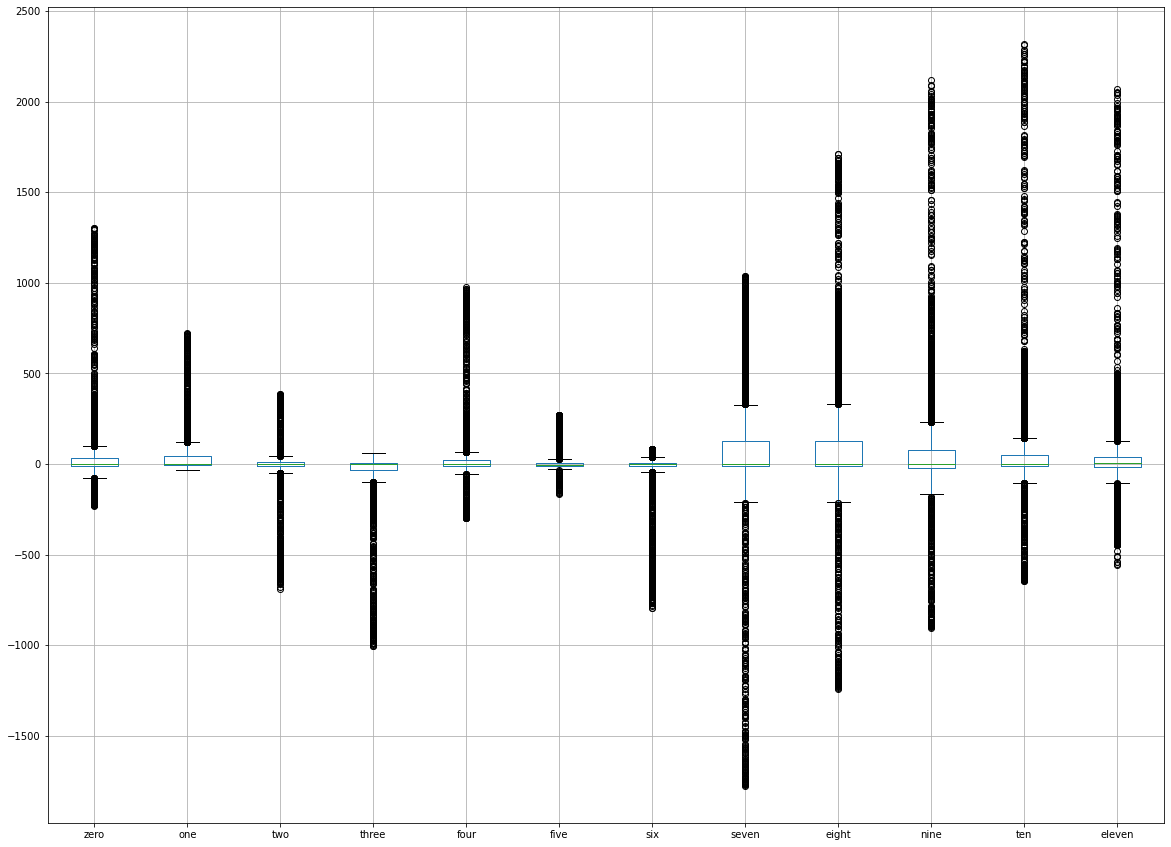

In [11]:
plt.figure(1, figsize=(20, 15))
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f18bf1610>,
      dtype=object)

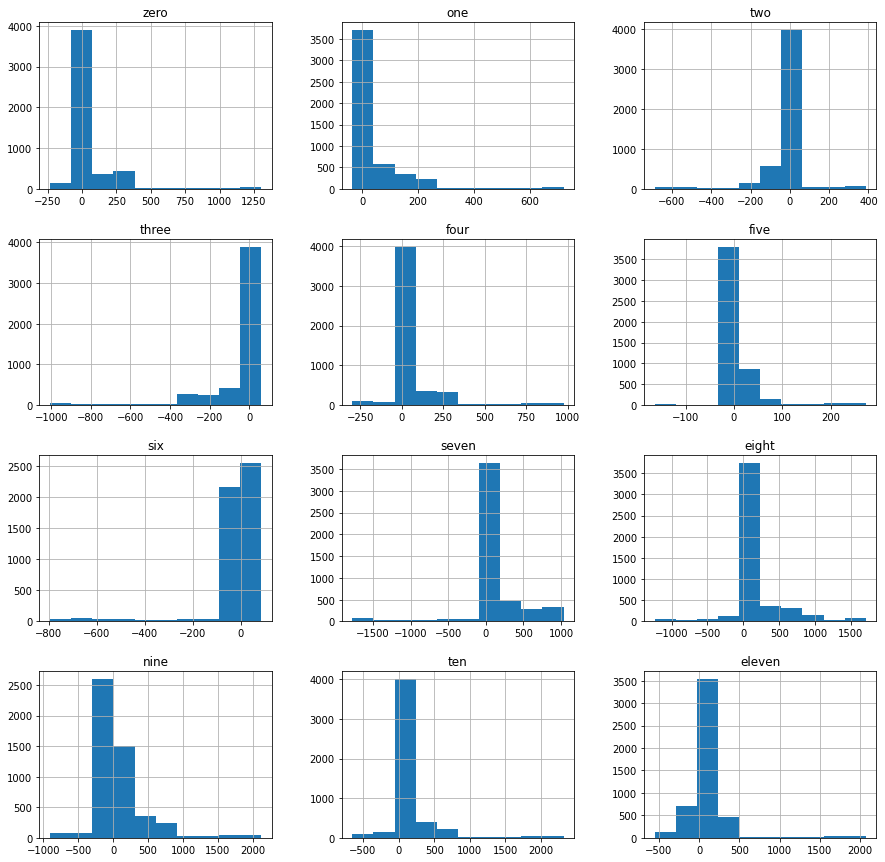

In [12]:
df.hist(figsize = (15,15))

In [13]:
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

In [14]:
df_standardized = z_score(df)

df_standardized.head()

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven
0,-0.392970,-0.669522,-0.135272,0.524756,-0.242910,-0.943906,0.901598,-0.167683,-0.380033,-0.395191,-0.314076,-0.183810
1,-0.408417,-0.665286,-0.099366,0.534909,-0.264730,-0.895734,0.886263,-0.166974,-0.377116,-0.390646,-0.316251,-0.187729
2,-0.433724,-0.658569,-0.042751,0.550759,-0.300511,-0.816561,0.871149,-0.165350,-0.371904,-0.386129,-0.316571,-0.191673
3,-0.472648,-0.647607,0.043256,0.574030,-0.355996,-0.692333,0.855978,-0.162298,-0.363161,-0.381687,-0.313964,-0.195689
4,-0.521094,-0.631579,0.151877,0.601382,-0.426222,-0.530644,0.840315,-0.157848,-0.351258,-0.377357,-0.308468,-0.199805


# 3. Однофакторний  дисперсійний аналіз

In [15]:
df_standardized_long = df_standardized.melt(value_vars=list(df_standardized.columns), var_name='channel')
df_standardized_long

,channel,value
0,zero,-0.392970
1,zero,-0.408417
2,zero,-0.433724
3,zero,-0.472648
4,zero,-0.521094
...,...,...
59995,eleven,-0.236615
59996,eleven,-0.219366
59997,eleven,-0.192389
59998,eleven,-0.159547


In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statistics

lm = ols('value ~ C(channel)', data=df_standardized_long).fit()
table = sm.stats.anova_lm(lm)
print(table)



                 df        sum_sq       mean_sq             F  PR(>F)
C(channel)     11.0  1.500373e-28  1.363975e-29  1.363975e-29     1.0
Residual    59988.0  5.998800e+04  1.000000e+00           NaN     NaN


# 4. Двофакторний аналіз даних

In [17]:
sample = np.concatenate((np.repeat(1, 1000), np.repeat(2, 1000), np.repeat(3, 1000), np.repeat(4, 1000), np.repeat(5, 1000)), axis=None)
df_standardized['sample'] = sample

In [18]:
df_standardized

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,sample
0,-0.392970,-0.669522,-0.135272,0.524756,-0.242910,-0.943906,0.901598,-0.167683,-0.380033,-0.395191,-0.314076,-0.183810,1
1,-0.408417,-0.665286,-0.099366,0.534909,-0.264730,-0.895734,0.886263,-0.166974,-0.377116,-0.390646,-0.316251,-0.187729,1
2,-0.433724,-0.658569,-0.042751,0.550759,-0.300511,-0.816561,0.871149,-0.165350,-0.371904,-0.386129,-0.316571,-0.191673,1
3,-0.472648,-0.647607,0.043256,0.574030,-0.355996,-0.692333,0.855978,-0.162298,-0.363161,-0.381687,-0.313964,-0.195689,1
4,-0.521094,-0.631579,0.151877,0.601382,-0.426222,-0.530644,0.840315,-0.157848,-0.351258,-0.377357,-0.308468,-0.199805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.204884,-0.102352,0.194014,0.189116,-0.217711,0.381542,0.403896,-0.129993,-0.287623,-0.182039,-0.091098,-0.236615,5
4996,-0.205735,-0.051361,0.244703,0.172129,-0.236624,0.519950,0.433386,-0.118353,-0.271310,-0.170130,-0.076814,-0.219366,5
4997,-0.217620,-0.004002,0.312311,0.163860,-0.267400,0.681539,0.472851,-0.102653,-0.249747,-0.154602,-0.059060,-0.192389,5
4998,-0.235425,0.038215,0.385869,0.161320,-0.302900,0.849388,0.517668,-0.083822,-0.224948,-0.137185,-0.039508,-0.159547,5


In [19]:
channels_names = list(df_standardized.columns)
df_standardized_long = df_standardized.melt(id_vars=['sample'], value_vars=channels_names, var_name='channel')
df_standardized_long

,sample,channel,value
0,1,zero,-0.392970
1,1,zero,-0.408417
2,1,zero,-0.433724
3,1,zero,-0.472648
4,1,zero,-0.521094
...,...,...,...
59995,5,eleven,-0.236615
59996,5,eleven,-0.219366
59997,5,eleven,-0.192389
59998,5,eleven,-0.159547


In [20]:
lm = ols('value ~ C(channel)*C(sample)', data=df_standardized_long).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(channel),11.0,5.268409e-28,4.789463e-29,4.789357e-29,1.000000
C(sample),4.0,6.554184e+00,1.638546e+00,1.638510e+00,0.161433
C(channel):C(sample),44.0,4.012181e+01,9.118594e-01,9.118393e-01,0.638548
Residual,59940.0,5.994132e+04,1.000022e+00,NaN,NaN


# 5. Перетворення Фур'є

In [21]:
N = 5000
t = 10
Fs = 500
t_step = 1 / Fs
f_step = Fs / N

In [22]:
t = np.linspace(0, (N - 1)*t_step, N)
f = np.linspace(0, (N - 1)*f_step, N)

In [113]:
FourierTransformation = np.fft.fft(df_standardized['eleven'])
FourierTransformation

array([-2.30926389e-14  +0.j        ,  1.18575778e+02 -51.86998238j,
       -5.20618479e+01+123.98340891j, ..., -4.98473857e+00+148.71026815j,
       -5.20618479e+01-123.98340891j,  1.18575778e+02 +51.86998238j])

In [114]:
FourierTransformation_magnitude = np.abs(FourierTransformation) / N
FourierTransformation_magnitude

array([4.61852778e-18, 2.58849069e-02, 2.68941047e-02, ...,
       2.97587577e-02, 2.68941047e-02, 2.58849069e-02])

In [115]:
f_ = f[0:int(N/2+1)]
FourierTransformation_magnitude_pl = 2 * FourierTransformation_magnitude[0:int(N/2+1)]
FourierTransformation_magnitude_pl[0] = FourierTransformation_magnitude_pl[0] / 2

In [116]:
inverseFourierTransformation = np.fft.ifft(FourierTransformation)
inverseFourierTransformation

array([-0.18380952+2.08499884e-17j, -0.18772933+2.25230945e-16j,
       -0.19167322-3.63231667e-16j, ..., -0.19238905-1.82653144e-17j,
       -0.15954732-4.56382826e-17j, -0.12456158-5.05922419e-17j])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


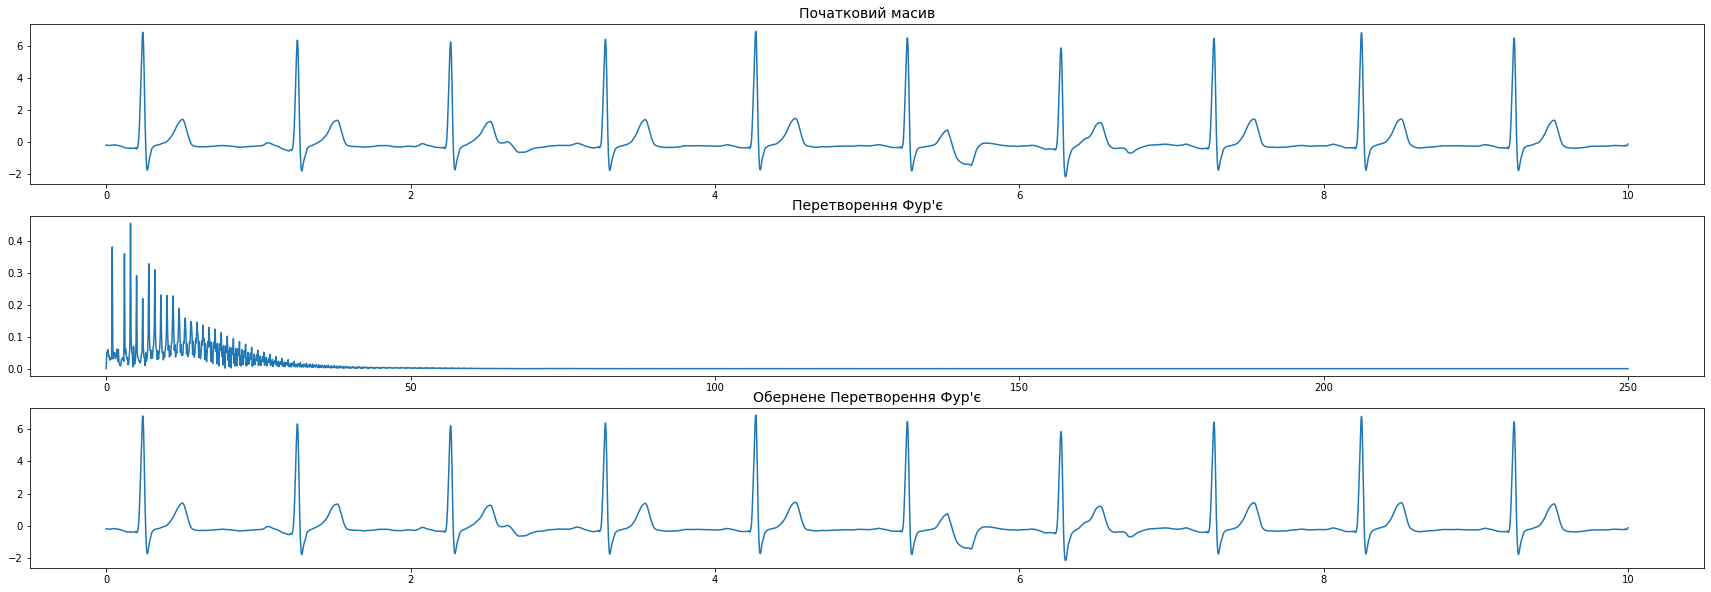

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(30, 10))
ax1.plot(t, df_standardized['eleven'])
ax1.set_title('Початковий масив', fontsize = 14)
ax2.plot(f_, FourierTransformation_magnitude_pl)
ax2.set_title('Перетворення Фур\'є', fontsize = 14)
ax3.plot(t, inverseFourierTransformation)
ax3.set_title('Обернене Перетворення Фур\'є', fontsize = 14)
plt.show()

# 6. Кореляційний аналіз

In [54]:
df_copy = df_standardized.copy(deep=True)
corr_matrix = df_copy.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

0.99069843394116

In [56]:
def partial_corr(ab, bc, ac):
  return (ab - ac * bc) / (((1-ac*ac) ** (1/2)) * ((1-bc*bc) ** (1/2)))


partial_corr(corr_matrix["zero"]["one"], corr_matrix["zero"]["four"], corr_matrix["one"]["four"])

0.9977008701016992

In [ ]:
def mult_corr_coef(ab, bc, ac):
  return np.sqrt((ab*ab + ac*ac - 2*ab*ac*bc) / (1 - bc*bc))

mult_corr_coef(corr_matrix["zero"]["one"], corr_matrix["zero"]["four"], corr_matrix["one"]["four"])

# 7. Factor analysis 

In [124]:

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df)
kmo_model

In [125]:

fa = FactorAnalyzer(rotation=None)
fa.fit(df)
ev,v = fa.get_eigenvalues()

array([8.53293487e+00, 2.16658961e+00, 1.11041415e+00, 1.06583048e-01,
       3.25363271e-02, 2.62784216e-02, 1.74825113e-02, 3.06244673e-03,
       2.23901729e-03, 1.38858217e-03, 4.14589203e-04, 7.64317872e-05])

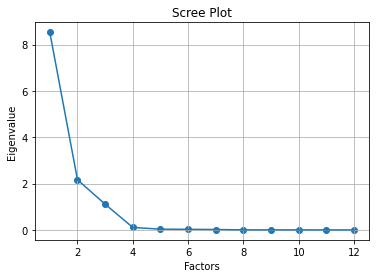

In [32]:
ev

In [33]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

array([[ 0.99282164, -0.05859168, -0.05957387],
       [ 0.93589944, -0.11263927,  0.31377826],
       [-0.90248621,  0.00976093,  0.42305758],
       [-0.98931483,  0.07911277, -0.07904046],
       [ 0.97798433, -0.03979994, -0.18771632],
       [-0.00249897, -0.16511156,  0.98407165],
       [-0.55944793,  0.7967041 , -0.10276452],
       [ 0.35116314,  0.90980966, -0.14640239],
       [ 0.82836385,  0.55364309, -0.07928772],
       [ 0.91419292,  0.34650449, -0.04469842],
       [ 0.96185993,  0.20412991,  0.01770539],
       [ 0.96318203,  0.1290813 ,  0.02308944]])

(array([8.42241442, 1.99872864, 1.33199069]),
 array([0.70186787, 0.16656072, 0.11099922]),
 array([0.70186787, 0.86842859, 0.97942781]))

In [35]:
fa.set_params(n_factors=3, rotation = 'varimax')
fa.fit(df)
fa.loadings_

,0,1,2
0,-0.422592,0.031750,-0.972048
1,-0.428145,0.054296,-0.919720
2,-0.436213,0.094130,-0.831982
3,-0.447347,0.158629,-0.692615
4,-0.459861,0.241882,-0.510290
...,...,...,...
4995,-0.216727,-0.115848,0.365756
4996,-0.201828,-0.063041,0.515681
4997,-0.190459,0.010951,0.691416
4998,-0.181645,0.095123,0.873690


In [36]:
fa.get_factor_variance()

5000

In [ ]:
pca_df = pd.DataFrame(fa.transform(df.values))
pca_df

In [37]:
len(pca_df)

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,cluster
0,-14.514,-29.542,-34.6050,24.821,6.3932,-30.119,84.482,5.1443,-27.5010,-34.985,-7.7625,19.2110,0
1,-17.619,-29.093,-30.7140,26.356,3.0571,-28.203,82.611,5.4154,-26.4290,-33.400,-8.4981,18.0720,0
2,-22.706,-28.381,-24.5790,28.752,-2.4137,-25.054,80.767,6.0363,-24.5140,-31.825,-8.6064,16.9260,0
3,-30.530,-27.219,-15.2590,32.270,-10.8970,-20.113,78.916,7.2030,-21.3010,-30.276,-7.7247,15.7590,0
4,-40.268,-25.520,-3.4883,36.405,-21.6340,-13.682,77.005,8.9045,-16.9270,-28.766,-5.8652,14.5630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,23.293,30.578,1.0778,-25.919,10.2460,22.599,23.759,19.5530,6.4575,39.348,67.6680,3.8669,0
4996,23.122,35.983,6.5707,-28.487,7.3543,28.104,27.357,24.0030,12.4520,43.501,72.5000,8.8792,0
4997,20.733,41.003,13.8970,-29.737,2.6488,34.531,32.172,30.0050,20.3760,48.916,78.5060,16.7180,0
4998,17.154,45.478,21.8680,-30.121,-2.7789,41.207,37.640,37.2040,29.4890,54.990,85.1200,26.2610,0


# 8. Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = df.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaled)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_norm)
clust = kmeans.labels_
df_KMeans_5 = df.copy(deep=True)
df_KMeans_5['cluster'] = clust
df_KMeans_5

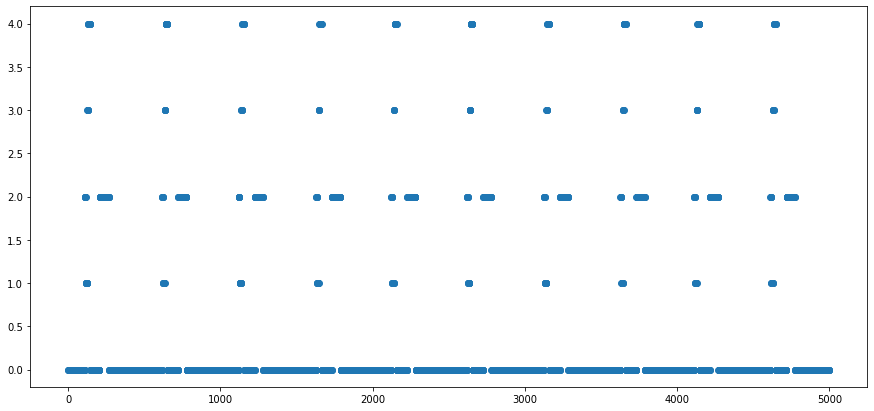

In [41]:
df_grouped = df_KMeans_5.groupby(by='cluster', as_index=False)['zero'].count()
df_grouped.sort_values(by='zero', ascending=False)

,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,cluster
0,-14.514,-29.542,-34.6050,24.821,6.3932,-30.119,84.482,5.1443,-27.5010,-34.985,-7.7625,19.2110,6
1,-17.619,-29.093,-30.7140,26.356,3.0571,-28.203,82.611,5.4154,-26.4290,-33.400,-8.4981,18.0720,6
2,-22.706,-28.381,-24.5790,28.752,-2.4137,-25.054,80.767,6.0363,-24.5140,-31.825,-8.6064,16.9260,6
3,-30.530,-27.219,-15.2590,32.270,-10.8970,-20.113,78.916,7.2030,-21.3010,-30.276,-7.7247,15.7590,6
4,-40.268,-25.520,-3.4883,36.405,-21.6340,-13.682,77.005,8.9045,-16.9270,-28.766,-5.8652,14.5630,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,23.293,30.578,1.0778,-25.919,10.2460,22.599,23.759,19.5530,6.4575,39.348,67.6680,3.8669,6
4996,23.122,35.983,6.5707,-28.487,7.3543,28.104,27.357,24.0030,12.4520,43.501,72.5000,8.8792,6
4997,20.733,41.003,13.8970,-29.737,2.6488,34.531,32.172,30.0050,20.3760,48.916,78.5060,16.7180,6
4998,17.154,45.478,21.8680,-30.121,-2.7789,41.207,37.640,37.2040,29.4890,54.990,85.1200,26.2610,6


In [42]:
KMeans_5_results = df_KMeans_5['cluster'].reset_index().rename(columns={'index': 'time'})

,cluster,zero
6,6,3797
1,1,448
2,2,442
4,4,136
5,5,84
3,3,50
0,0,43


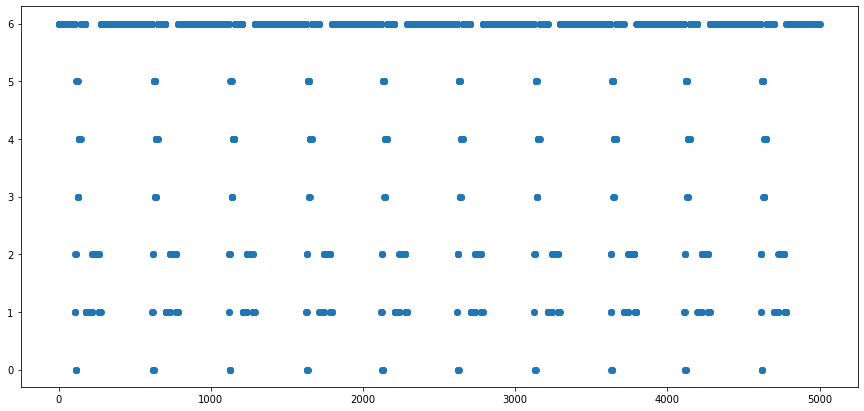

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(KMeans_5_results['time'], KMeans_5_results['cluster'])
plt.show()

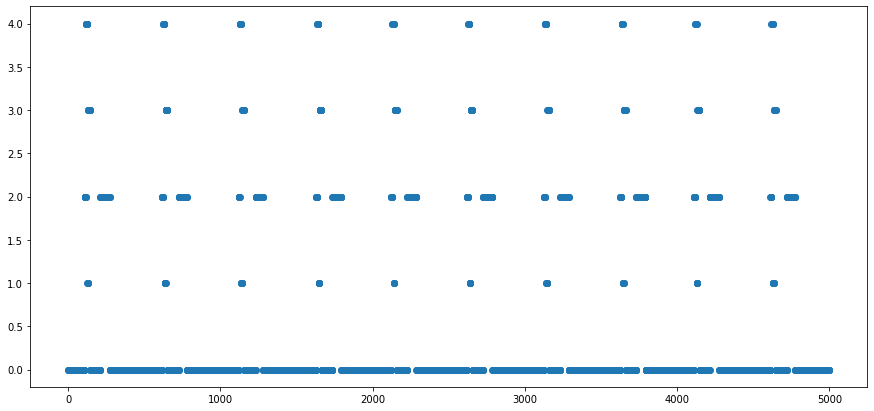

In [44]:

X = df.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaled)
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_norm)
clust = kmeans.labels_
df_KMeans_7 = df.copy(deep=True)
df_KMeans_7['cluster'] = clust
df_KMeans_7

,cluster,zero
0,0,4054
2,2,658
3,3,133
4,4,95
1,1,60


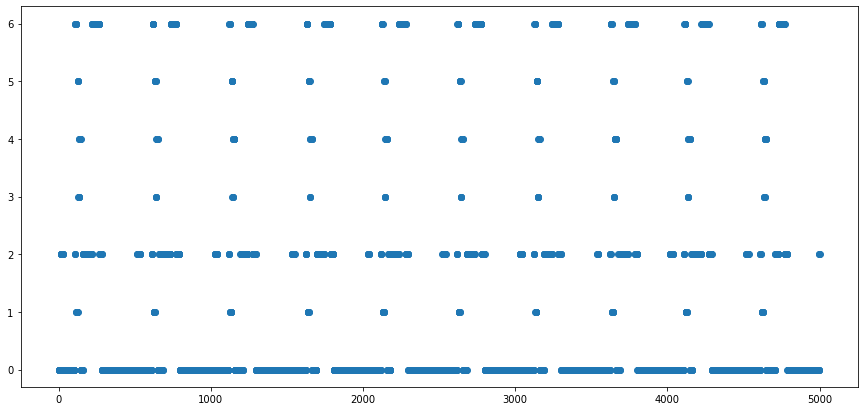

In [46]:
df_grouped = df_KMeans_7.groupby(by='cluster', as_index=False)['zero'].count()
df_grouped.sort_values(by='zero', ascending=False)

In [47]:
KMeans_7_results = df_KMeans_7['cluster'].reset_index().rename(columns={'index': 'time'})
plt.figure(figsize=(15,7))
plt.scatter(KMeans_7_results['time'], KMeans_7_results['cluster'])
plt.show()

,cluster,zero
0,0,3307
2,2,904
6,6,499
4,4,103
1,1,89
5,5,55
3,3,43


In [47]:
X = pca_df.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaled)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_norm)
clust = kmeans.labels_
pca_df_KMeans_5 = pca_df.copy(deep=True)
pca_df_KMeans_5['cluster'] = clust
pca_df_KMeans_5 = pca_df_KMeans_5.rename(columns={0: "zero", 1: "one", 2: "two"})
pca_df_grouped = pca_df_KMeans_5.groupby(by='cluster', as_index=False)['zero'].count()

KMeans_5_results = pca_df_KMeans_5['cluster'].reset_index().rename(columns={'index': 'time'})
plt.figure(figsize=(15,7))
plt.scatter(KMeans_5_results['time'], KMeans_5_results['cluster'])
plt.show()

In [ ]:
pca_df_grouped.sort_values(by='zero', ascending=False)

In [ ]:
X = pca_df.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaled)
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_norm)
clust = kmeans.labels_
pca_df_KMeans_7 = pca_df.copy(deep=True)
pca_df_KMeans_7['cluster'] = clust
pca_df_KMeans_7 = pca_df_KMeans_7.rename(columns={0: "zero", 1: "one", 2: "two"})
pca_df_grouped = pca_df_KMeans_7.groupby(by='cluster', as_index=False)['zero'].count()

KMeans_7_results = pca_df_KMeans_7['cluster'].reset_index().rename(columns={'index': 'time'})
plt.figure(figsize=(15,7))
plt.scatter(KMeans_7_results['time'], KMeans_7_results['cluster'])
plt.show()

In [ ]:
pca_df_grouped.sort_values(by='zero', ascending=False)